In [1]:
import pandas as pd

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import chardet
# Folder paths
benign_folder = "Benign\Benign/"  # Replace with the path to the benign folder
malicious_folder = "Malware\Malware/"  # Replace with the path to the malicious folder

# Load benign data
benign_files = os.listdir(benign_folder)
benign_data = pd.concat([pd.read_csv(os.path.join(benign_folder, file), usecols=[ "Time", "Source", "Destination", "Protocol", "Length","Info"]) for file in benign_files])

# Load malicious data
malicious_files = os.listdir(malicious_folder)
malicious_data = pd.DataFrame()

for file in malicious_files:
    filepath = os.path.join(malicious_folder, file)
    encoding = 'utf-8'  # Default encoding

    try:
        # Try reading the file with utf-8 encoding
        malicious_data = pd.concat([malicious_data, pd.read_csv(filepath, encoding=encoding, usecols=[ "Time", "Source", "Destination", "Protocol", "Length","Info"])])
    except UnicodeDecodeError:
        # If utf-8 decoding fails, try detecting the encoding
        with open(filepath, 'rb') as f:
            result = chardet.detect(f.read())
        encoding = result['encoding']

        # Read CSV with detected encoding
        malicious_data = pd.concat([malicious_data, pd.read_csv(filepath, encoding=encoding, usecols=[ "Time", "Source", "Destination", "Protocol", "Length","Info"])])



In [3]:
# Display the first few rows of the benign data
print("Benign Data:")
print(benign_data.head())



Benign Data:
       Time      Source  Destination Protocol  Length  \
0  0.000000  1.1.33.158  1.2.156.163    SSLv3    1475   
1  0.000002  1.1.23.218   1.2.31.193    SSLv3     163   
2  0.000004   1.2.84.77  1.1.252.248      TCP      70   
3  0.000004  1.1.71.180    1.2.79.35    SSLv3    1475   
4  0.000005  1.1.41.222   1.2.129.94    SSLv3     136   

                                                Info  
0                                   Application Data  
1                                   Application Data  
2  443  >  22794 [ACK] Seq=1 Ack=1 Win=49232 Len=...  
3                                   Application Data  
4                                   Application Data  


In [4]:
# Display the first few rows of the malicious data
print("Malicious Data:")
print(malicious_data.head())



Malicious Data:
       Time                     Source        Destination  Protocol  Length  \
0  0.000000                        NaN                NaN  Ethernet      60   
1  7.218304          PcsCompu_fb:bb:39          Broadcast       ARP      42   
2  7.218435                         ::  ff02::1:ff01:e8a5    ICMPv6      78   
3  7.218473  fe80::705a:530f:1701:e8a5            ff02::2    ICMPv6      70   
4  7.218524  fe80::705a:530f:1701:e8a5           ff02::16    ICMPv6      90   

                                                Info  
0               [Packet size limited during capture]  
1                    Who has 10.0.2.108? (ARP Probe)  
2  Neighbor Solicitation for fe80::705a:530f:1701...  
3         Router Solicitation from 08:00:27:fb:bb:39  
4               Multicast Listener Report Message v2  


In [5]:
malicious_data.shape

(2878927, 6)

In [6]:
benign_data.shape

(2908513, 6)

In [7]:
# Removing rows with ARP and DHCP protocol from benign dataset
benign_data = benign_data[(benign_data['Protocol'] != 'ARP') & (benign_data['Protocol'] != 'DHCP')]

# Removing rows with ARP and DHCP protocol from malicious dataset
malicious_data = malicious_data[(malicious_data['Protocol'] != 'ARP') & (malicious_data['Protocol'] != 'DHCP')]


In [8]:
# Display the first few rows of the benign data
print("Benign Data:")
print(benign_data.head())

Benign Data:
       Time      Source  Destination Protocol  Length  \
0  0.000000  1.1.33.158  1.2.156.163    SSLv3    1475   
1  0.000002  1.1.23.218   1.2.31.193    SSLv3     163   
2  0.000004   1.2.84.77  1.1.252.248      TCP      70   
3  0.000004  1.1.71.180    1.2.79.35    SSLv3    1475   
4  0.000005  1.1.41.222   1.2.129.94    SSLv3     136   

                                                Info  
0                                   Application Data  
1                                   Application Data  
2  443  >  22794 [ACK] Seq=1 Ack=1 Win=49232 Len=...  
3                                   Application Data  
4                                   Application Data  


In [9]:
# Display the first few rows of the benign data
print("Benign Data:")
print(benign_data.head())


Benign Data:
       Time      Source  Destination Protocol  Length  \
0  0.000000  1.1.33.158  1.2.156.163    SSLv3    1475   
1  0.000002  1.1.23.218   1.2.31.193    SSLv3     163   
2  0.000004   1.2.84.77  1.1.252.248      TCP      70   
3  0.000004  1.1.71.180    1.2.79.35    SSLv3    1475   
4  0.000005  1.1.41.222   1.2.129.94    SSLv3     136   

                                                Info  
0                                   Application Data  
1                                   Application Data  
2  443  >  22794 [ACK] Seq=1 Ack=1 Win=49232 Len=...  
3                                   Application Data  
4                                   Application Data  


In [13]:
# Add a 'Class' column to each DataFrame
benign_data['Class'] = 1
malicious_data['Class'] = 0

# Concatenate the DataFrames
combined_data = pd.concat([benign_data, malicious_data], ignore_index=True)

In [14]:
combined_data.shape

(5728618, 7)

In [15]:
combined_data.head()

,Time,Source,Destination,Protocol,Length,Info,Class
0,0.000000,1.1.33.158,1.2.156.163,SSLv3,1475,Application Data,1
1,0.000002,1.1.23.218,1.2.31.193,SSLv3,163,Application Data,1
2,0.000004,1.2.84.77,1.1.252.248,TCP,70,443 > 22794 [ACK] Seq=1 Ack=1 Win=49232 Len=...,1
3,0.000004,1.1.71.180,1.2.79.35,SSLv3,1475,Application Data,1
4,0.000005,1.1.41.222,1.2.129.94,SSLv3,136,Application Data,1


In [16]:
class_counts = combined_data['Class'].value_counts()
class_0_count = class_counts[0]
class_1_count = class_counts[1]


In [17]:
print(class_0_count)

2820105


In [18]:
print(class_1_count)

2908513


In [24]:
!pip3 install transformers

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import TensorDataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

C:\Users\parth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
# Convert "Info" column to a list of strings
info_texts = combined_data["Info"].tolist()

In [28]:
import math
import re
# Calculate the number of rows for the random half
random_half_size = math.ceil(len(combined_data) / 100)

# Randomly select a half from the DataFrame
random_half_data = combined_data.sample(n=random_half_size, random_state=42)

# Preprocess the "Info" column
preprocessed_texts = random_half_data["Info"].astype(str).apply(lambda x: re.sub(r"[^\w\s]", "", x).lower().strip())

# Convert preprocessed texts to a list of strings
info_texts = preprocessed_texts.tolist()




In [29]:
random_half_data.shape

(57287, 7)

In [30]:
class_counts_new = random_half_data['Class'].value_counts()
class_0_count_new = class_counts_new[0]
class_1_count_new = class_counts_new[1]


In [31]:
class_0_count_new

28353

In [32]:
class_1_count_new

28934

In [33]:

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize text and convert labels to numerical values
inputs = tokenizer.batch_encode_plus(
    info_texts,
    padding=True,
    truncation=True,
    return_tensors="pt"
)

In [34]:
input_ids = inputs["input_ids"]
attention_mask = inputs["attention_mask"]
labels = LabelEncoder().fit_transform(random_half_data["Class"])

# Step 6: Train/Test Split
train_inputs, test_inputs, train_labels, test_labels = train_test_split(
    input_ids, labels, test_size=0.2, random_state=42
)
train_masks, test_masks, _, _ = train_test_split(
    attention_mask, input_ids, test_size=0.2, random_state=42
)

# Convert inputs, masks, and labels into PyTorch tensors
train_inputs = torch.tensor(train_inputs)
train_labels = torch.tensor(train_labels)
train_masks = torch.tensor(train_masks)
test_inputs = torch.tensor(test_inputs)
test_labels = torch.tensor(test_labels)
test_masks = torch.tensor(test_masks)

# Create DataLoader for batch processing
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_dataloader = DataLoader(train_data, batch_size=16, shuffle=True)
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_dataloader = DataLoader(test_data, batch_size=16, shuffle=False)

# Step 7: Model Training
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
optimizer = AdamW(model.parameters(), lr=2e-5)



C:\Users\parth\AppData\Local\Temp\ipykernel_12788\945447729.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_inputs = torch.tensor(train_inputs)
C:\Users\parth\AppData\Local\Temp\ipykernel_12788\945447729.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_masks = torch.tensor(train_masks)
C:\Users\parth\AppData\Local\Temp\ipykernel_12788\945447729.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_inputs = torch.tensor(test_inputs)
C:\Users\parth\AppData\Local\Temp\ipykernel_12788\945447729.py:19: UserWarning: To 

In [46]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print(device)
epochs = 3
train_loss_values = []
test_accuracy_values = []
train_accuracy_values=[]

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_dataloader:
        batch_inputs, batch_masks, batch_labels = tuple(t.to(device) for t in batch)

        optimizer.zero_grad()

        outputs = model(
            input_ids=batch_inputs,
            attention_mask=batch_masks,
            labels=batch_labels
        )

        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    average_loss = total_loss / len(train_dataloader)
    train_loss_values.append(average_loss)

    print(f"Epoch: {epoch+1}, Average Loss: {average_loss}")

    # Calculate training accuracy
    model.eval()
    train_predictions = []
    train_true_labels = []
    with torch.no_grad():
        for batch in train_dataloader:
            batch_inputs, batch_masks, batch_labels = tuple(t.to(device) for t in batch)

            outputs = model(
                input_ids=batch_inputs,
                attention_mask=batch_masks
            )
            _, predicted_labels = torch.max(outputs.logits, dim=1)

            train_predictions.extend(predicted_labels.tolist())
            train_true_labels.extend(batch_labels.tolist())

        train_accuracy = (torch.tensor(train_predictions) == torch.tensor(train_true_labels)).sum().item() / len(train_true_labels)
        train_accuracy_values.append(test_accuracy)
        print(f"Training Accuracy: {train_accuracy}")

    # Calculate testing accuracy
    test_predictions = []
    test_true_labels = []
    with torch.no_grad():
        for batch in test_dataloader:
            batch_inputs, batch_masks, batch_labels = tuple(t.to(device) for t in batch)

            outputs = model(
                input_ids=batch_inputs,
                attention_mask=batch_masks
            )
            _, predicted_labels = torch.max(outputs.logits, dim=1)

            test_predictions.extend(predicted_labels.tolist())
            test_true_labels.extend(batch_labels.tolist())

        test_predictions = torch.tensor(test_predictions)
        test_true_labels = torch.tensor(test_true_labels)
        test_accuracy = (test_predictions == test_true_labels).sum().item() / len(test_true_labels)
        test_accuracy_values.append(test_accuracy)
        print(f"Testing Accuracy: {test_accuracy}")


cuda
Epoch: 1, Average Loss: 0.008283385974252062
Training Accuracy: 0.9946322197735059
Testing Accuracy: 0.9948507592948158
Epoch: 2, Average Loss: 0.00755696441603225
Training Accuracy: 0.9961814571559493
Testing Accuracy: 0.9958107872229011
Epoch: 3, Average Loss: 0.010984147006985813
Training Accuracy: 0.9944358375700976
Testing Accuracy: 0.9937161808343515


In [36]:
from sklearn.metrics import confusion_matrix

train_cm = confusion_matrix(train_true_labels, train_predictions)
print("Confusion Matrix - Training:")
print(train_cm)

Confusion Matrix - Training:
[[22703     0]
 [  185 22941]]


In [37]:
!pip3 install seaborn


In [ ]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

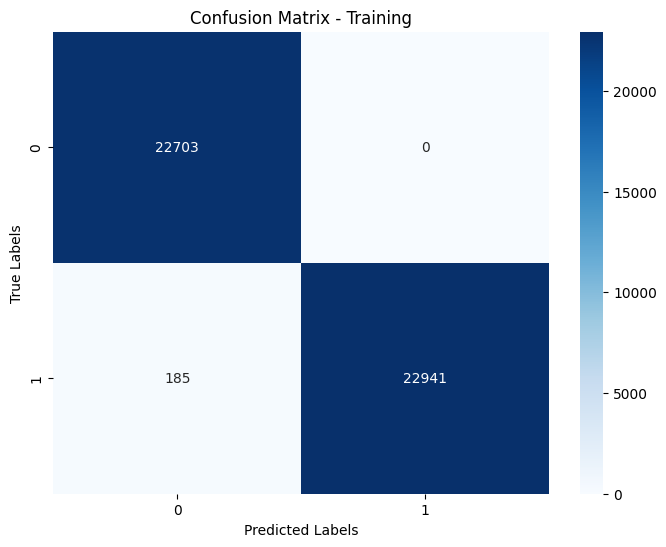

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Training")
plt.show()

In [39]:
from sklearn.metrics import confusion_matrix

train_cm = confusion_matrix(test_true_labels, test_predictions)
print("Confusion Matrix - Testing:")
print(train_cm)

Confusion Matrix - Testing:
[[5650    0]
 [  50 5758]]


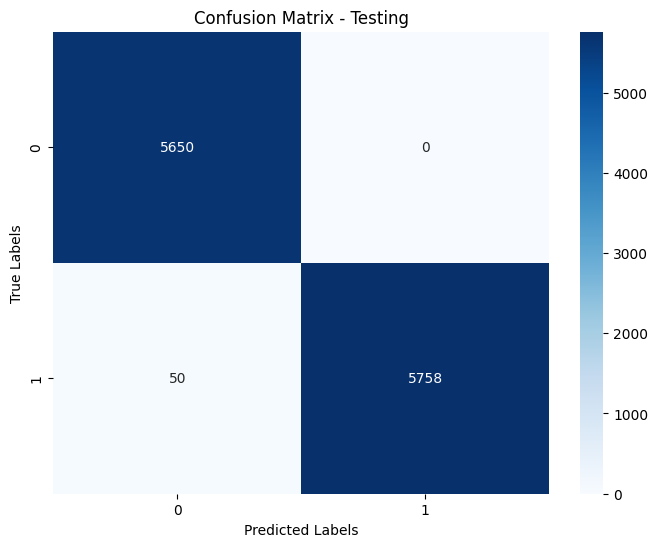

In [40]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Testing")
plt.show()

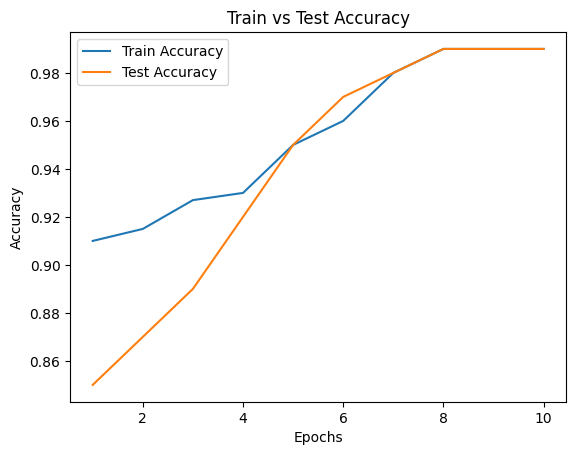

In [58]:
# Plot the train vs test accuracy graph
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, train_accuracy_values, label='Train Accuracy')
plt.plot(epochs_range, test_accuracy_values, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.legend()
plt.show()

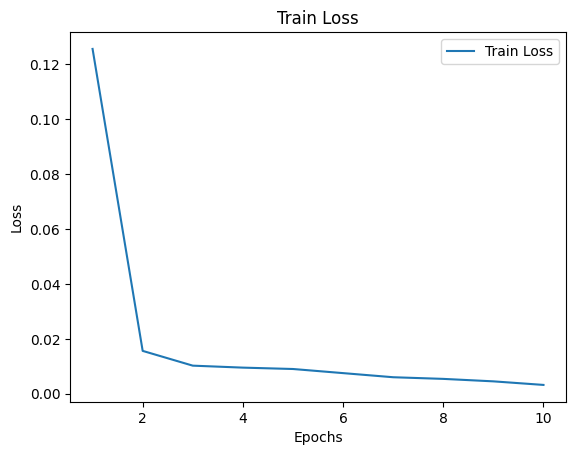

In [70]:
import matplotlib.pyplot as plt

# Create epochs range
epochs_range = range(1, epochs + 1)

# Plot the loss graph
plt.plot(epochs_range, train_loss_values, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss')
plt.legend()
plt.show()
